In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os import path

%matplotlib inline

In [2]:
def plot_property(prob, n, res, t, prop, xlim):
    # check the type
    if t:
        thr = 'maxpred'
    else : thr = 'pred'
    # check property code
    if prop == 1:
        color = 'royalblue'
        mask = lambda x: (x.max_level <= 1) & (x.avg_level < 0)
    if prop == 0:
        color = 'darkorange'
        mask = lambda x: (x.max_level == 0)
    
    
    fig, axs = plt.subplots(len(res), 1, figsize = (8,12))
    for i, t in enumerate(res):
        data = {}
        for p in prob:
            if not path.exists('data/{}/data_{}_{}.csv'.format(thr, n, p)):
                    continue
            # load data
            temp = pd.read_csv('data/{}/data_{}_{}.csv'.format(thr, n, p), index_col=0)
            # on each realization check for which nodes the property is realized
            temp2 = temp[temp.resistance == t].groupby('realization').apply(mask)
            data[p] = (pd.DataFrame(temp2).groupby('realization').sum() > 0).mean()
            del temp, temp2
        
        # plot data
        axs[i].set_title('Phase transition for t = {}'.format(t), fontsize=15)
        _ = axs[i].plot(list(data.keys()), list(data.values()), 'o-', color=color)
        _ = axs[i].set_xlim(xmax=xlim)
        _ = axs[i].set_xlabel('probability')

        # delete from memory
        del data

    #plt.suptitle('Phase transition for maxlevel < 1, n = {}, {}'.format(n, lab), y=1.02, fontsize=20)
    plt.tight_layout()
    plt.savefig('images/p{}_{}_{}.jpeg'.format(prop, thr, n))

Used radius: [0.014400000000000001, 0.03219937887599697, 0.04598834429845876, 0.04643989029049284, 0.06, 0.1, 0.3, 0.6, 0.7, 0.8]
Used radius: [0.006439875775199394, 0.0144, 0.021338332552616968, 0.022311989807061363, 0.04, 0.1, 0.3, 0.6, 0.7, 0.8]
Used radius: [0.004553679830642466, 0.010182337649086283, 0.01530744386794582, 0.01621488773589164, 0.04, 0.1, 0.3, 0.6, 0.7, 0.8]


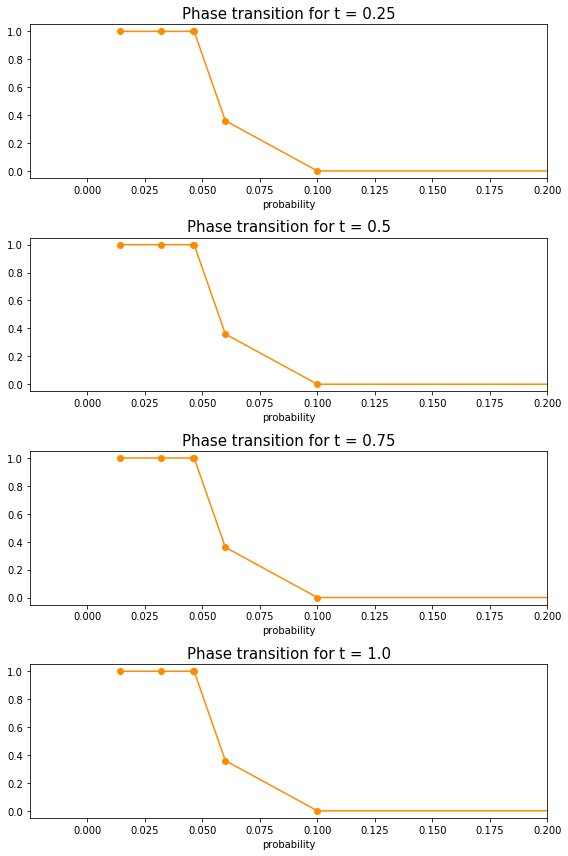

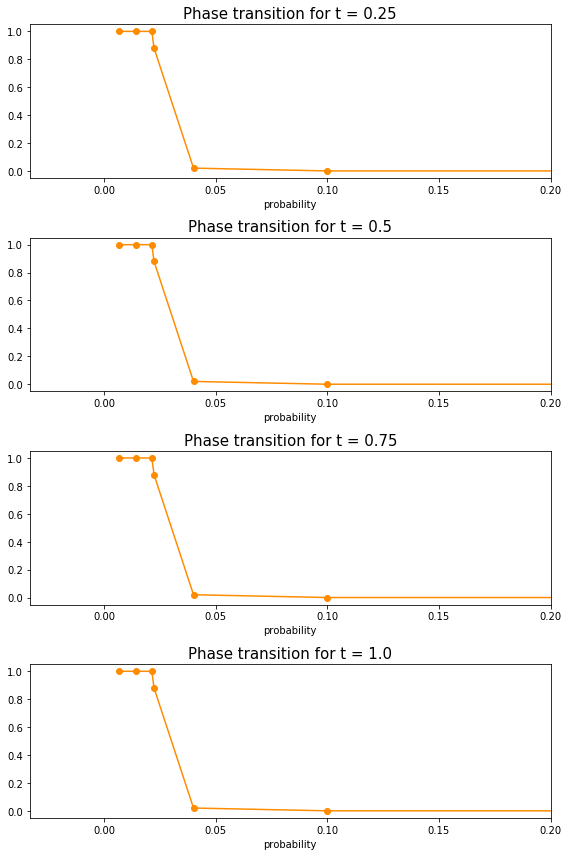

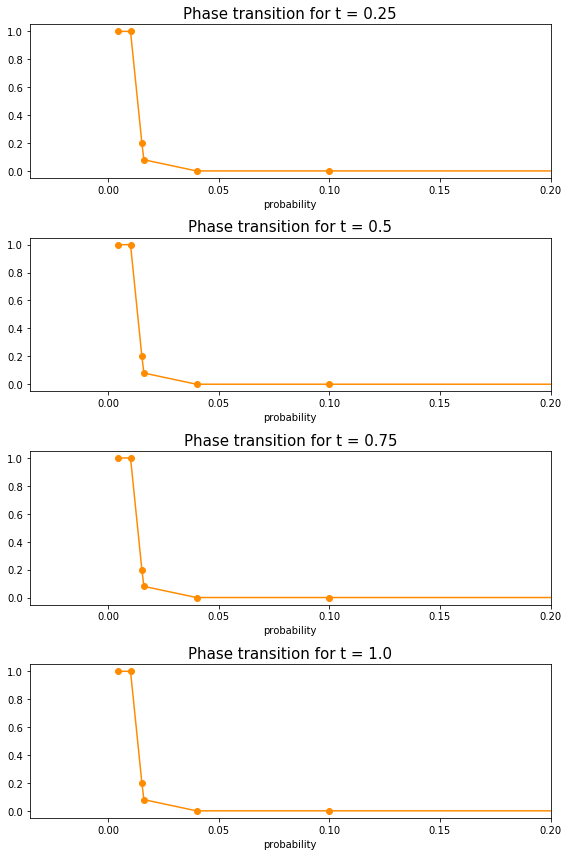

In [3]:
# type: {True : maxpred, False: pred}
t = False
# property code (0 or 1)
p = 0

for N in [1000, 5000, 10000]:
    # reading probabilities
    with open('data/keys{}.txt'.format(N), 'r') as f:
        prob = eval(f.read())
    prob.sort()
    print('Used radius:', prob)
    # reading resistances
    res = np.load('data/res_phase1.npy')

    # show data on nodes per resistance value, for each gnp (mean on sample)
    plot_property(prob, N, res, t, p, 0.2)

Used radius: [0.014400000000000001, 0.03219937887599697, 0.04598834429845876, 0.04643989029049284, 0.06, 0.1, 0.3, 0.6, 0.7, 0.8]
Used radius: [0.006439875775199394, 0.0144, 0.021338332552616968, 0.022311989807061363, 0.04, 0.1, 0.3, 0.6, 0.7, 0.8]
Used radius: [0.004553679830642466, 0.010182337649086283, 0.01530744386794582, 0.01621488773589164, 0.04, 0.1, 0.3, 0.6, 0.7, 0.8]


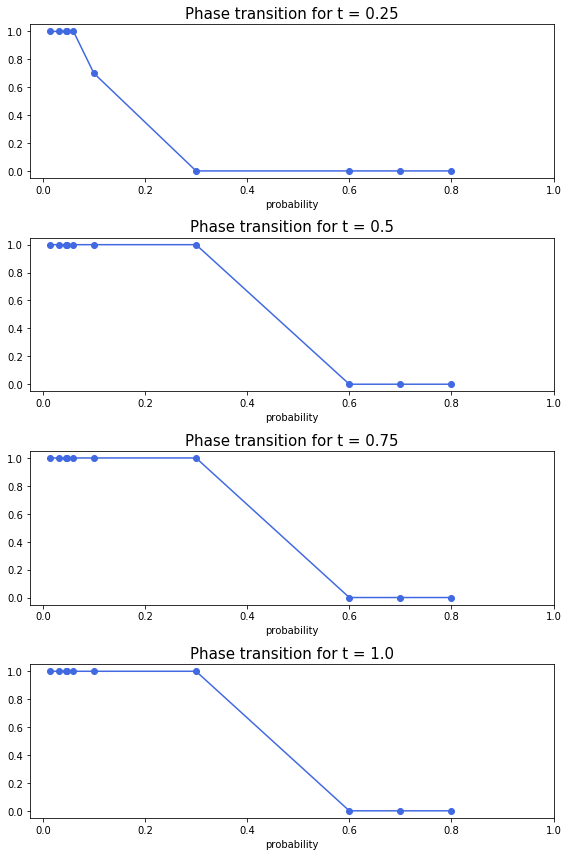

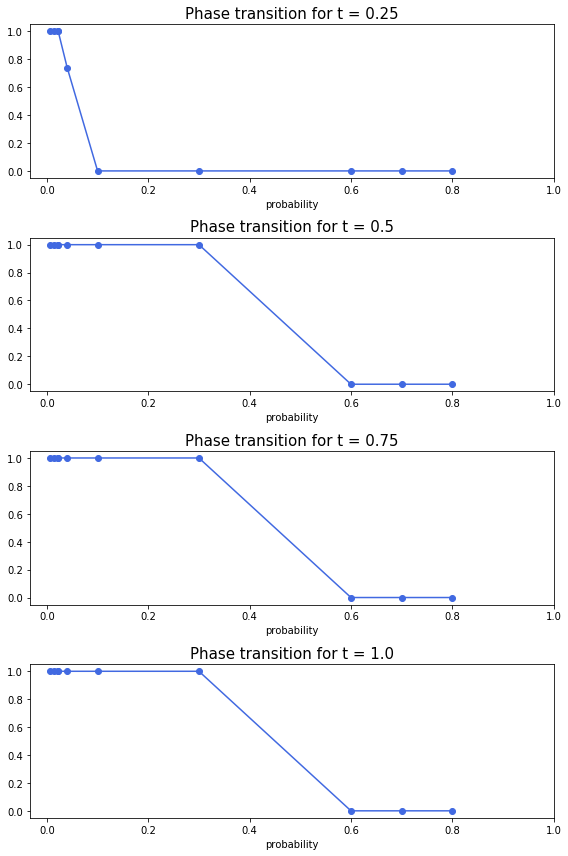

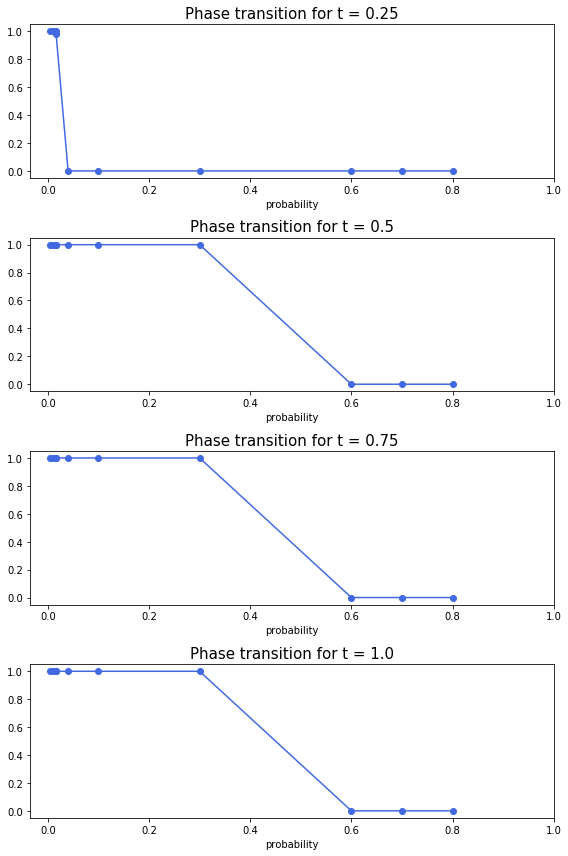

In [4]:
# type: {True : maxpred, False: pred}
t = False
# property code (0 or 1)
p = 1

for N in [1000, 5000, 10000]:
    # reading probabilities
    with open('data/keys{}.txt'.format(N), 'r') as f:
        prob = eval(f.read())
    prob.sort()
    print('Used radius:', prob)
    # reading resistances
    res = np.load('data/res_phase1.npy')

    # show data on nodes per resistance value, for each gnp (mean on sample)
    plot_property(prob, N, res, t, p, 1)

Used radius: [0.014400000000000001, 0.03219937887599697, 0.04598834429845876, 0.04643989029049284, 0.06, 0.1, 0.3, 0.6, 0.7, 0.8]
Used radius: [0.006439875775199394, 0.0144, 0.021338332552616968, 0.022311989807061363, 0.04, 0.1, 0.3, 0.6, 0.7, 0.8]
Used radius: [0.004553679830642466, 0.010182337649086283, 0.01530744386794582, 0.01621488773589164, 0.04, 0.1, 0.3, 0.6, 0.7, 0.8]


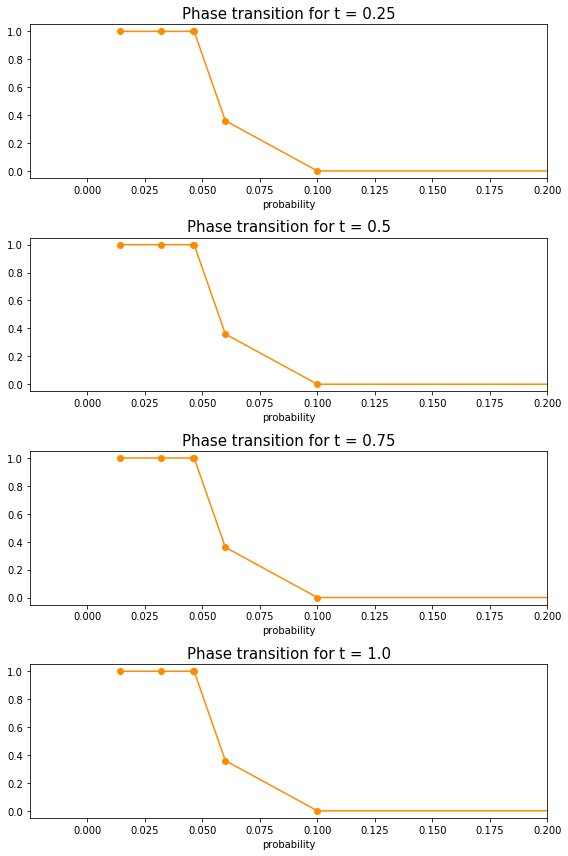

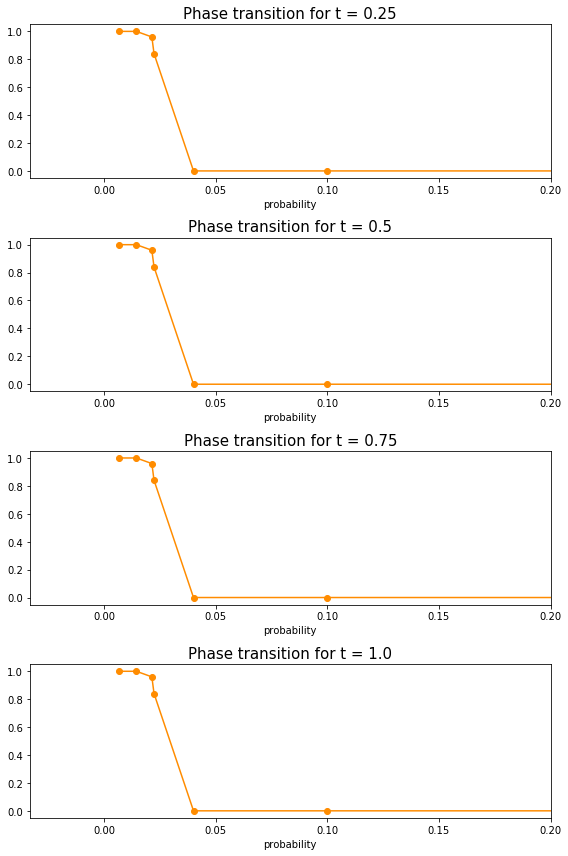

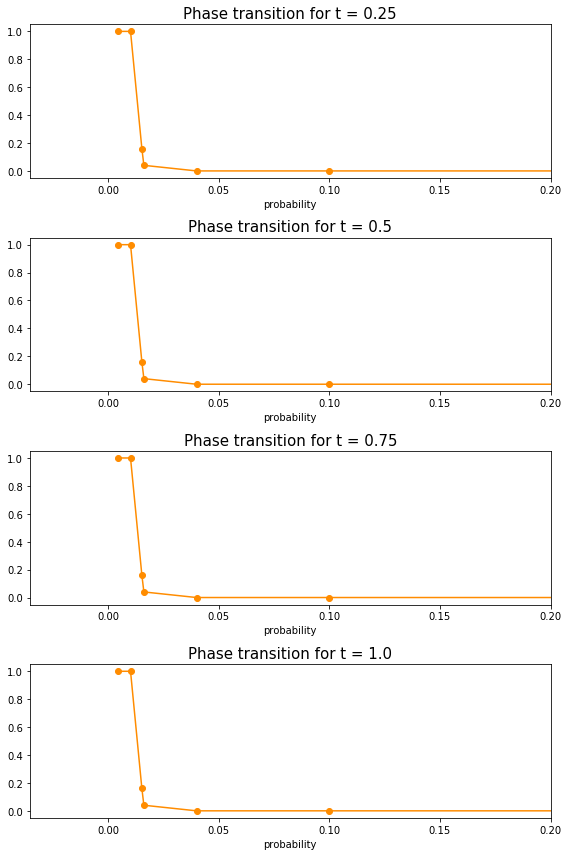

In [5]:
# type: {True : maxpred, False: pred}
t = True
# property code (0 or 1)
p = 0

for N in [1000, 5000, 10000]:
    # reading probabilities
    with open('data/keys{}.txt'.format(N), 'r') as f:
        prob = eval(f.read())
    prob.sort()
    print('Used radius:', prob)
    # reading resistances
    res = np.load('data/res_phase1.npy')

    # show data on nodes per resistance value, for each gnp (mean on sample)
    plot_property(prob, N, res, t, p, 0.2)

Used radius: [0.014400000000000001, 0.03219937887599697, 0.04598834429845876, 0.04643989029049284, 0.06, 0.1, 0.3, 0.6, 0.7, 0.8]
Used radius: [0.006439875775199394, 0.0144, 0.021338332552616968, 0.022311989807061363, 0.04, 0.1, 0.3, 0.6, 0.7, 0.8]
Used radius: [0.004553679830642466, 0.010182337649086283, 0.01530744386794582, 0.01621488773589164, 0.04, 0.1, 0.3, 0.6, 0.7, 0.8]


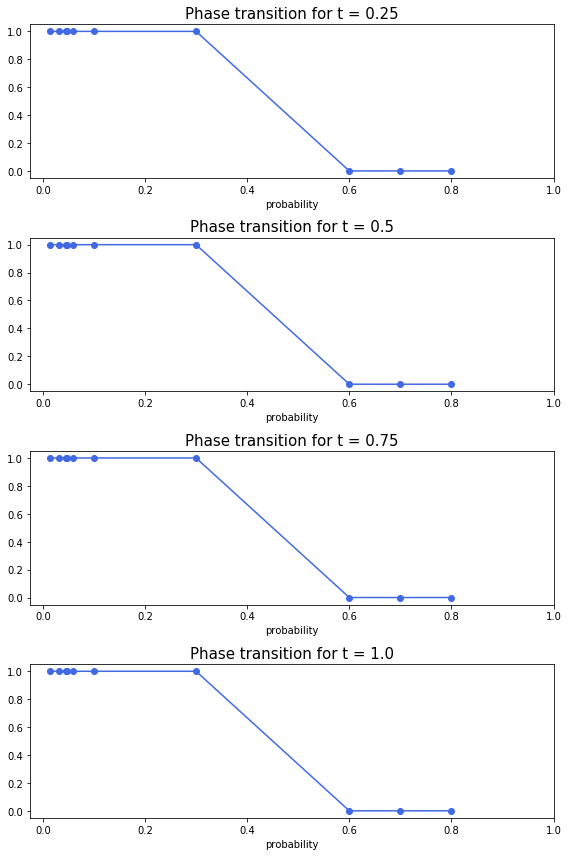

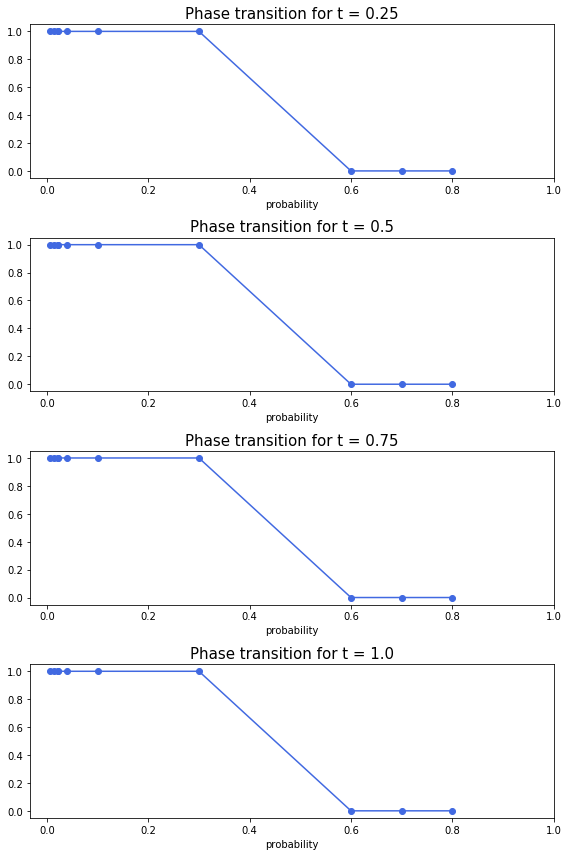

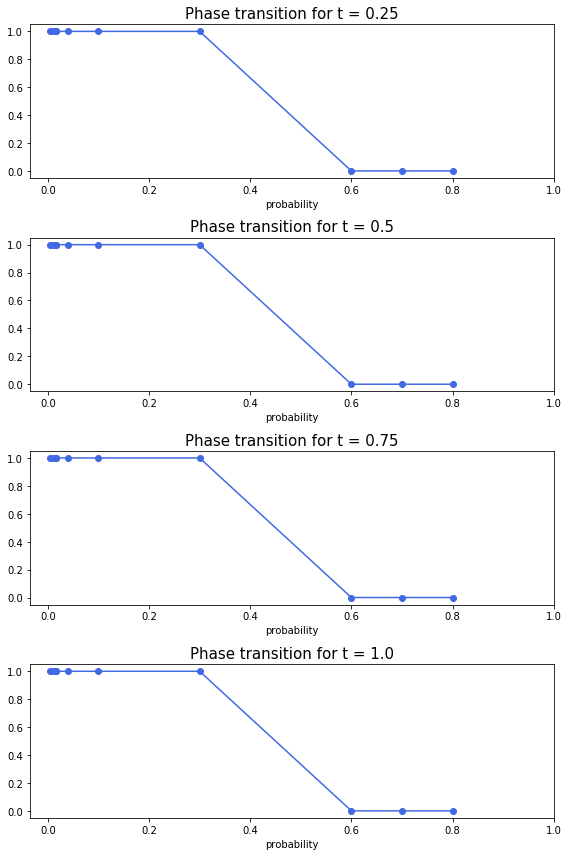

In [6]:
# type: {True : maxpred, False: pred}
t = True
# property code (0 or 1)
p = 1

for N in [1000, 5000, 10000]:
    # reading probabilities
    with open('data/keys{}.txt'.format(N), 'r') as f:
        prob = eval(f.read())
    prob.sort()
    print('Used radius:', prob)
    # reading resistances
    res = np.load('data/res_phase1.npy')

    # show data on nodes per resistance value, for each gnp (mean on sample)
    plot_property(prob, N, res, t, p, 1)